# **Schema Discovery**

In [ ]:
pip install pyarrow dask apache_beam


# **1. Use PyArrow (Python) to Read Parquet Schema**

One of the most popular ways to inspect Parquet files in Python is by using the **PyArrow** library.

### **PyArrow**
**PyArrow** is a Python library that provides efficient data interoperability and in-memory columnar storage for big data processing. It is part of the **Apache Arrow** project, which focuses on providing high-performance data processing, especially in the context of modern big data ecosystems.

#### **Key Features of PyArrow:**
1. **In-Memory Columnar Data Format**: PyArrow provides access to the **Apache Arrow** columnar memory format, designed for efficient data storage and processing across different platforms and languages.
   
2. **Data Interoperability**: It enables fast data exchange between different systems and libraries such as **Pandas**, **Spark**, **Dask**, and more, without serialization overhead. This allows zero-copy data transfers, making it highly efficient for distributed systems.

3. **Support for Parquet**: PyArrow has built-in support for reading and writing **Apache Parquet** files, one of the most common columnar storage formats used in big data systems.

4. **Efficient File Formats**: It supports a variety of file formats, including **Feather**, **ORC**, and **CSV**, making it a versatile tool for big data processing.

5. **Memory Mapping**: PyArrow enables memory mapping of files, which allows fast access to data stored on disk without loading it entirely into memory.

#### **Typical Use Cases:**
- **Loading and saving Parquet files** in big data processing workflows.
- **Efficient data exchange** between Python data libraries like Pandas, Dask, and other platforms.
- **Zero-copy data sharing** between different systems or languages, avoiding the cost of serialization.
- **In-memory analytics** where high performance is critical, such as in real-time data applications.

#### **Key Benefits:**
- **High Performance**: In-memory, columnar data format optimizes data processing, especially for analytical workloads.
- **Interoperability**: Provides seamless data sharing between platforms, allowing for efficient integration in modern big data ecosystems.
- **File Format Support**: Native support for Parquet, Feather, ORC, and more, facilitating easy interaction with structured data.
- **Efficient Data Sharing**: Enables fast, zero-copy data sharing between systems without requiring data serialization.

**PyArrow** is widely used for big data processing and analytics, especially for applications requiring high-performance data exchange and storage. It is commonly integrated with tools like **Pandas**, **Spark**, and **Dask** in large-scale data science workflows.

Here's how you can use it to read the schema:

In [ ]:
#@title # **Schema Discovery with pyarrow**
import pyarrow.parquet as pq

# Path to your parquet file (can be local or in GCS)
#parquet_file = 'gs://your-bucket-name/new-york-taxi-trips/tlc-yellow-trips-2022/sample-file.parquet'
parquet_file = 'gs://gcp-lakehouse-tables-c24c8562/new-york-taxi-trips/tlc-yellow-trips-2022/taxi-000000000000.Parquet'

# Read the Parquet file and print its schema
parquet_table = pq.read_table(parquet_file)
print(parquet_table.schema)


vendor_id: string not null
pickup_datetime: timestamp[us]
dropoff_datetime: timestamp[us]
passenger_count: int64
trip_distance: decimal128(38, 9)
rate_code: string
store_and_fwd_flag: string
payment_type: string
fare_amount: decimal128(38, 9)
extra: decimal128(38, 9)
mta_tax: decimal128(38, 9)
tip_amount: decimal128(38, 9)
tolls_amount: decimal128(38, 9)
imp_surcharge: decimal128(38, 9)
airport_fee: decimal128(38, 9)
total_amount: decimal128(38, 9)
pickup_location_id: string
dropoff_location_id: string
data_file_year: int64
data_file_month: int64


# **2. Google Cloud Dataflow Schema Discovery (For ETL Pipelines)**

We can use **Google Cloud Dataflow** for processing Parquet files, you can inspect the schema as part of the pipeline when reading the Parquet file.

**Google Cloud Dataflow** is a fully managed stream and batch data processing service that enables users to build data pipelines. It uses **Apache Beam** as the unified programming model to design and execute data workflows, supporting a variety of data processing tasks, including ETL (Extract, Transform, Load), real-time analytics, and machine learning.

### **Key Features of Google Cloud Dataflow:**
1. **Unified Programming Model**: Dataflow uses **Apache Beam**, which allows you to write both batch and stream processing jobs using a single programming model.
   
2. **Fully Managed Service**: It handles resource provisioning, scaling, and optimization automatically, so you don't need to manage infrastructure.

3. **Stream & Batch Processing**: Dataflow supports both **real-time stream processing** and **batch processing**, making it ideal for varied data workloads.

4. **Auto-Scaling**: Dataflow dynamically scales your data pipelines based on the volume and velocity of data, reducing the need for manual adjustments.

5. **Integration with Google Cloud Services**: It integrates with **BigQuery**, **Cloud Storage**, **Pub/Sub**, and **Bigtable**, making it easy to build end-to-end data processing pipelines.

### **Typical Use Cases:**
- **Real-time stream processing** (e.g., analyzing live event data from IoT devices or financial transactions).
- **Batch data processing** for ETL workflows (e.g., preparing data for machine learning models).
- **Data pipeline orchestration** for large-scale data migrations or transformations.
- **Event-driven architectures**, such as processing logs, metrics, or user activity in real time.

### **Key Benefits:**
- **Managed infrastructure** allows you to focus on pipeline logic, not on operational tasks.
- **Cost-effectiveness** due to auto-scaling and serverless architecture.
- **Global scalability** ensures that you can handle growing datasets in real-time without performance issues.

Google Cloud Dataflow is widely used for real-time data analytics, ETL pipelines, and scalable data processing, especially for big data use cases.

An example of Python Dataflow job using Apache Beam:

In [ ]:
pip install --upgrade apache-beam[gcp]


In [ ]:
#@title **Without Limit**
import apache_beam as beam
from apache_beam.io.parquetio import ReadFromParquet

# Path to your parquet file
#parquet_path = 'gs://your-bucket-name/sample-file.parquet'
parquet_path = 'gs://gcp-lakehouse-tables-c24c8562/new-york-taxi-trips/tlc-yellow-trips-2022/taxi-000000000000.Parquet'

# Beam pipeline to read the Parquet schema
with beam.Pipeline() as pipeline:
    rows = pipeline | 'Read Parquet' >> ReadFromParquet(parquet_path)
    rows | 'Print Schema' >> beam.Map(print)


Streaming output truncated to the last 5000 lines.
{'vendor_id': '2', 'pickup_datetime': datetime.datetime(2022, 1, 30, 18, 48), 'dropoff_datetime': datetime.datetime(2022, 1, 30, 18, 58), 'passenger_count': None, 'trip_distance': Decimal('1.660000000'), 'rate_code': None, 'store_and_fwd_flag': None, 'payment_type': '0', 'fare_amount': Decimal('13.000000000'), 'extra': Decimal('0E-9'), 'mta_tax': Decimal('0.500000000'), 'tip_amount': Decimal('3.510000000'), 'tolls_amount': Decimal('0E-9'), 'imp_surcharge': Decimal('0.300000000'), 'airport_fee': None, 'total_amount': Decimal('19.810000000'), 'pickup_location_id': '224', 'dropoff_location_id': '148', 'data_file_year': 2022, 'data_file_month': 1}
{'vendor_id': '1', 'pickup_datetime': datetime.datetime(2022, 1, 31, 6, 49, 49), 'dropoff_datetime': datetime.datetime(2022, 1, 31, 7, 5, 16), 'passenger_count': None, 'trip_distance': Decimal('2.500000000'), 'rate_code': None, 'store_and_fwd_flag': None, 'payment_type': '0', 'fare_amount': Decim

ERROR:apache_beam.runners.common:KeyboardInterrupt [while running '[5]: Print Schema']
Traceback (most recent call last):
  File "apache_beam/runners/common.py", line 1495, in apache_beam.runners.common.DoFnRunner.process
  File "apache_beam/runners/common.py", line 688, in apache_beam.runners.common.SimpleInvoker.invoke_process
  File "/usr/local/lib/python3.10/dist-packages/apache_beam/transforms/core.py", line 2063, in <lambda>
    wrapper = lambda x, *args, **kwargs: [fn(x, *args, **kwargs)]
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 402, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 203, in schedule
    self._event_pipe.send(b'')
  File "/usr/local/lib/python3.10/dist-packages/zmq/sugar/socket.py", line 620, in send
    return super().send(data, flags=flags, copy=copy, track=track)
  File "zmq/backend/cython/socket.pyx", line 746, in zmq.backe


{'vendor_id': '2', 'pickup_datetime': datetime.datetime(2022, 1, 18, 11, 32, 59), 'dropoff_datetime': datetime.datetime(2022, 1, 18, 11, 51, 52), 'passenger_count': 5, 'trip_distance': Decimal('2.300000000'), 'rate_code': '1.0', 'store_and_fwd_flag': 'N', 'payment_type': '2', 'fare_amount': Decimal('13.000000000'), 'extra': Decimal('0E-9'), 'mta_tax': Decimal('0.500000000'), 'tip_amount': Decimal('0E-9'), 'tolls_amount': Decimal('0E-9'), 'imp_surcharge': Decimal('0.300000000'), 'airport_fee': Decimal('0E-9'), 'total_amount': Decimal('16.300000000'), 'pickup_location_id': '230', 'dropoff_location_id': '141', 'data_file_year': 2022, 'data_file_month': 1}
{'vendor_id': '2', 'pickup_datetime': datetime.datetime(2022, 1, 18, 11, 27, 35), 'dropoff_datetime': datetime.datetime(2022, 1, 18, 11, 47, 12), 'passenger_count': 1, 'trip_distance': Decimal('2.040000000'), 'rate_code': '1.0', 'store_and_fwd_flag': 'N', 'payment_type': '2', 'fare_amount': Decimal('13.000000000'), 'extra': Decimal('0E-

RuntimeError: KeyboardInterrupt [while running '[5]: Print Schema']

In [ ]:
#@title **With Limit**

import apache_beam as beam
from apache_beam.io.parquetio import ReadFromParquet
from apache_beam.transforms.combiners import Sample
import json

parquet_path = 'gs://gcp-lakehouse-tables-c24c8562/new-york-taxi-trips/tlc-yellow-trips-2022/taxi-000000000000.Parquet'

# Set the limit for how many rows to print
limit = 10

# Beam pipeline to read the Parquet file and limit the output
with beam.Pipeline() as pipeline:
    rows = pipeline | 'Read Parquet' >> ReadFromParquet(parquet_path)

    # Sample the first 'limit' number of rows
    sampled_rows = rows | 'Sample Rows' >> Sample.FixedSizeGlobally(limit)

    # Print each row as single-line JSON without any formatting or conversions
    sampled_rows | 'Print Sampled Rows' >> beam.Map(lambda row: print(json.dumps(row, default=str)))


[{"vendor_id": "2", "pickup_datetime": "2022-01-30 19:44:49", "dropoff_datetime": "2022-01-30 19:55:50", "passenger_count": 2, "trip_distance": "1.530000000", "rate_code": "1.0", "store_and_fwd_flag": "N", "payment_type": "1", "fare_amount": "8.500000000", "extra": "0E-9", "mta_tax": "0.500000000", "tip_amount": "2.360000000", "tolls_amount": "0E-9", "imp_surcharge": "0.300000000", "airport_fee": "0E-9", "total_amount": "14.160000000", "pickup_location_id": "48", "dropoff_location_id": "162", "data_file_year": 2022, "data_file_month": 1}, {"vendor_id": "1", "pickup_datetime": "2022-01-14 11:48:28", "dropoff_datetime": "2022-01-14 12:00:29", "passenger_count": 1, "trip_distance": "2.000000000", "rate_code": "1.0", "store_and_fwd_flag": "N", "payment_type": "2", "fare_amount": "9.500000000", "extra": "2.500000000", "mta_tax": "0.500000000", "tip_amount": "0E-9", "tolls_amount": "0E-9", "imp_surcharge": "0.300000000", "airport_fee": "0E-9", "total_amount": "12.800000000", "pickup_location

# **3. Use Google Cloud Dataproc with Apache Spark**

You can use **Google Cloud Dataproc** with **Apache Spark** to read the Parquet file and inspect the schema.

### **Google Cloud Dataproc**
**Google Cloud Dataproc** is a fast, easy-to-use, and fully managed service for running **Apache Spark**, **Apache Hadoop**, **Apache Hive**, **Apache Pig**, and other big data frameworks on **Google Cloud**. It provides on-demand clusters for data processing, machine learning, and ETL workloads, all while reducing the complexity of cluster management.

#### **Key Features of Google Cloud Dataproc:**
1. **Fully Managed Cluster Management**: Dataproc manages Hadoop and Spark clusters, making it easy to spin up, manage, and tear down clusters on-demand with minimal configuration.
   
2. **Cost-Effective**: Dataproc uses **per-second billing**, ensuring cost efficiency. Clusters can be scaled up or down based on workloads, and ephemeral clusters can be set up for temporary workloads.

3. **Integrates with GCP Services**: Dataproc seamlessly integrates with Google Cloud services such as **BigQuery**, **Cloud Storage**, **Pub/Sub**, and **Bigtable**, simplifying data processing workflows.

4. **Flexible Deployment**: Dataproc clusters can be deployed quickly and easily, with support for scaling, customization, and hybrid or multi-cloud setups.

5. **Automated Cluster Scaling**: Clusters can automatically scale based on the job load, optimizing resource use and reducing manual intervention.

#### **Typical Use Cases:**
- Running large-scale **batch data processing** and **ETL jobs**.
- **Machine learning** model training and analysis using distributed computing.
- **Data lakes** and **data warehouse** integration pipelines.
- Processing **big data analytics** with Apache Spark and Hadoop.

#### **Key Benefits:**
- **Ease of Use**: Automates much of the complexity of managing clusters.
- **Cost-Effective**: Per-second billing ensures you only pay for the resources you use.
- **Scalability**: Easily scales for large-scale data processing jobs.
- **Flexibility**: Can be integrated with other Google Cloud services and external data sources.

Dataproc is ideal for companies that want to run Apache Spark or Hadoop workloads in the cloud without managing complex infrastructure.

---

### **Apache Spark**
**Apache Spark** is an open-source, distributed computing system that provides a fast, in-memory processing framework designed for large-scale data processing. It supports multiple languages (Python, Scala, Java, R) and provides libraries for SQL, streaming data, machine learning, and graph processing.

#### **Key Features of Apache Spark:**
1. **In-Memory Processing**: Spark processes data in-memory, which makes it much faster than traditional disk-based processing frameworks like Hadoop MapReduce.
   
2. **Unified Analytics Engine**: Spark offers support for multiple workloads, including **batch processing**, **real-time streaming**, **machine learning**, **graph processing**, and **SQL**.

3. **Ease of Use**: Spark provides high-level APIs in Python (PySpark), Scala, Java, and R, which makes it easy to write parallel processing applications.

4. **Distributed Computing**: Spark can efficiently distribute data across a cluster of computers for large-scale data processing and can be run on local machines, on-premises clusters, or in the cloud.

5. **Fault-Tolerant**: Spark offers automatic fault tolerance by rerunning failed operations on data that is stored across different nodes in a cluster.

#### **Typical Use Cases:**
- **Big Data Processing** for large datasets, such as log processing or ETL pipelines.
- **Real-time stream processing** with Spark Streaming.
- **Machine Learning** with Spark MLlib.
- **Ad-hoc querying and analytics** using Spark SQL.


#### **Key Benefits:**
- **Speed**: Spark’s in-memory processing can be up to 100x faster than traditional big data tools.
- **Versatile**: A unified platform supporting various data processing workloads, such as batch processing, stream processing, and machine learning.
- **Scalability**: Spark scales easily across thousands of nodes and can process petabytes of data.
- **Ecosystem Support**: Spark is integrated with many data processing ecosystems, including Hadoop, Hive, HBase, and major cloud platforms.

Apache Spark is commonly used for big data analytics, machine learning, stream processing, and large-scale ETL operations across industries.

---

Both **Google Cloud Dataproc** and **Apache Spark** are powerful tools for distributed data processing, but **Dataproc** simplifies the cluster management and scaling aspects, while **Spark** provides a robust engine for distributed processing across multiple workloads.

In [ ]:
pip install pyspark

  Using cached pyspark-3.5.3.tar.gz (317.3 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=ed471ac78dc2a3900e42f48241e02a33d6082077aaec16177293047b2c559777
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
! spark-submit --jars /path/to/gcs-connector-hadoop3-latest.jar my_spark_script.py


/bin/bash: line 1: spark-submit: command not found


In [14]:
from pyspark.sql import SparkSession

# Initialize Spark Session with GCS connector
spark = SparkSession.builder \
    .appName("Read Parquet from GCS") \
    .config("spark.jars", "gs://hadoop-lib/gcs/gcs-connector-hadoop3-latest.jar") \
    .getOrCreate()

# Set up GCS configuration
hadoop_conf = spark._jsc.hadoopConfiguration()
hadoop_conf.set("fs.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem")
hadoop_conf.set("fs.abstract.path.to.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFS")
hadoop_conf.set("fs.gs.auth.service.account.enable", "true")
hadoop_conf.set("fs.gs.auth.service.account.json.keyfile", "/path/to/your/service-account-key.json")

# Path to your Parquet file in Google Cloud Storage (GCS)
parquet_path = 'gs://gcp-lakehouse-tables-c24c8562/new-york-taxi-trips/tlc-yellow-trips-2022/taxi-000000000000.Parquet'

try:
    # Read the Parquet file into a Spark DataFrame
    df = spark.read.parquet(parquet_path)

    # Print the schema of the DataFrame
    print("DataFrame Schema:")
    df.printSchema()

    # Show the first 10 rows of the DataFrame
    print("\nFirst 10 rows of the DataFrame:")
    df.show(10, truncate=False)

except Exception as e:
    print(f"An error occurred: {str(e)}")

finally:
    # Stop the Spark Session
    spark.stop()

An error occurred: An error occurred while calling o102.parquet.
: java.lang.RuntimeException: java.lang.ClassNotFoundException: Class com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem not found
	at org.apache.hadoop.conf.Configuration.getClass(Configuration.java:2688)
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3431)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$checkAndGlobPathIfNecessary$1(DataSource.scala:724)
	at scala.collection.immutable.List.map(List.scala:293)
	at org.apache.spark.sql.execution.datasources.DataSource$.checkAn

### Explanation:

1. **Spark Session Initialization**:
   - `spark = SparkSession.builder.appName("Read Parquet and Show Schema").getOrCreate()` initializes a Spark session. If you're running on **Google Dataproc**, Spark is already set up, so this will work seamlessly.
   
2. **Read the Parquet File**:
   - `df = spark.read.parquet(parquet_path)` reads the Parquet file from the specified Google Cloud Storage (GCS) path into a **Spark DataFrame**.

3. **Print the Schema**:
   - `df.printSchema()` prints the schema of the DataFrame, including column names, data types, and whether the fields are nullable.

4. **Show the First 10 Rows**:
   - `df.show(10, truncate=False)` displays the first 10 rows of the DataFrame in full (without truncating column values). You can change the `truncate` option to `True` if you want column values to be truncated after 20 characters.

5. **Stop the Spark Session**:
   - After the job is done, we stop the Spark session to release resources: `spark.stop()`.


# **Comparison of PyArrow, Cloud Data Flow and Cloud Dataproc with PySpark**

Here’s a **tabular comparison** of **PyArrow**, **Google Cloud Dataflow**, and **Google Cloud Dataproc with Apache Spark**, along with guidance on when each is better suited for specific use cases.

| Feature/Aspect                     | **PyArrow**                                           | **Google Cloud Dataflow**                             | **Google Cloud Dataproc with Apache Spark**           |
|------------------------------------|------------------------------------------------------|------------------------------------------------------|------------------------------------------------------|
| **Primary Purpose**                | Efficient in-memory data processing and interchange  | Stream and batch data processing (serverless ETL, real-time analytics) | Distributed data processing with Hadoop/Spark, including ML and ETL |
| **Processing Type**                | In-memory, single-node processing                    | Distributed processing for both batch and streaming   | Distributed processing (batch/streaming with Hadoop/Spark) |
| **Programming Model**              | Python-based APIs for in-memory data manipulation    | Unified programming model with **Apache Beam**        | **Apache Spark** (SQL, streaming, machine learning)   |
| **Integration**                    | Interoperability between Pandas, Spark, Dask, etc.   | Google Cloud services (BigQuery, Cloud Storage, Pub/Sub) | Hadoop, Spark, Hive, Pig, GCP services (BigQuery, GCS) |
| **Data Formats Supported**         | Apache Arrow, Parquet, Feather, ORC                  | Any format supported by Beam (Parquet, Avro, etc.)    | CSV, Parquet, ORC, JSON, HDFS, and more via Spark/Hadoop |
| **Data Size**                      | Suitable for small to medium-sized data in memory    | Large-scale data, supports real-time streams and massive batch workloads | Large-scale data (Big Data), typically at the terabyte/petabyte scale |
| **Complexity of Setup**            | Simple setup in Python environments (local/single-node) | Managed service, no infrastructure management needed  | Requires cluster setup, but Dataproc simplifies cluster management |
| **Auto-scaling**                   | N/A (single machine)                                 | Yes (automatic scaling based on workload)             | Manual scaling (can scale via Dataproc auto-scaling)  |
| **Fault Tolerance**                | Limited (single machine)                             | High (built-in retries and fault tolerance)           | High (Spark’s DAG model ensures fault tolerance)      |
| **Cost**                           | Minimal (single machine, local environment)          | Pay-per-use, auto-scales down when idle               | Pay-per-use, cluster billed per second, manual scaling may be required |
| **Performance**                    | Extremely fast in-memory processing                  | Fast for both batch and streaming (cloud-native)      | Fast, especially for in-memory processing in Spark    |
| **Use Cases**                      | In-memory data manipulation, zero-copy data sharing  | ETL pipelines, real-time analytics, stream processing | Big data processing, machine learning, large-scale ETL workflows |
| **Best for**                       | - Data interchange between libraries (Pandas, Dask, etc.)<br> - In-memory columnar analytics<br> - Small/medium datasets processed locally | - Real-time streaming analytics<br> - Large-scale ETL pipelines<br> - Serverless, auto-scaled processing workloads | - Large-scale distributed data processing<br> - Big data analytics<br> - Spark MLlib for machine learning |

### **When to Use PyArrow**
- **Best for In-Memory Operations**: PyArrow excels when you need efficient, **in-memory data processing**. It’s great for **data interchange** between frameworks like **Pandas**, **Spark**, and **Dask**.
- **File Format Handling**: Ideal for reading and writing **Parquet**, **Feather**, and **Arrow** formats for small to medium-sized datasets.
- **Single-Node, Local Processing**: Use PyArrow when working on **single-node** environments or handling smaller datasets that fit into memory.

**Use PyArrow when**:
- You are working in a Python environment and need high-performance, in-memory operations.
- You are working with **Pandas** or **Dask** and need to load or write **Parquet** or **Arrow** data files.
- You need **zero-copy** data sharing between different systems or languages.

### **When to Use Google Cloud Dataflow**
- **Best for Streaming and Real-Time Data**: Dataflow is ideal for **real-time stream processing** or **batch processing** of large datasets in a **fully managed, serverless** environment.
- **Complex ETL Pipelines**: Dataflow is well-suited for running **complex ETL pipelines** or orchestrating real-time data analytics.
- **Auto-Scaling**: Since Dataflow automatically scales, it is a great choice for dynamic workloads that require high scalability without manual intervention.

**Use Google Cloud Dataflow when**:
- You need to process real-time streaming data (e.g., from IoT devices or user logs).
- You want to build complex ETL pipelines that can handle both **batch** and **streaming data**.
- You want a **serverless** solution that automatically scales and manages the infrastructure.

### **When to Use Google Cloud Dataproc with Apache Spark**
- **Best for Large-Scale Distributed Processing**: Dataproc with Spark is great for large datasets, especially for **batch processing**, **data warehousing**, or **machine learning** tasks.
- **Big Data and Machine Learning**: If you are running **big data analytics** or **machine learning pipelines** using Spark’s MLlib, this is the right tool.
- **Hadoop and Spark Workloads**: Dataproc makes it easy to manage clusters for **Hadoop** and **Spark** workloads, especially if you're already familiar with these ecosystems.

**Use Google Cloud Dataproc with Apache Spark when**:
- You have large-scale **batch** or **streaming** jobs that require distributed processing.
- You need to run **machine learning models** using Spark MLlib or process data at **petabyte** scale.
- You are already familiar with the **Hadoop** or **Spark** ecosystems and want an easier way to manage clusters in the cloud.

### Summary:
- **Use PyArrow** for **efficient in-memory operations** and **data interchange**.
- **Use Cloud Dataflow** for **real-time stream processing** and **serverless ETL pipelines**.
- **Use Dataproc with Spark** for **distributed processing** of **large-scale data**, including **big data analytics** and **machine learning**.

Each tool has its strengths, depending on the nature of your workload (real-time vs. batch, in-memory vs. distributed, small vs. large datasets). Choose based on your **processing model**, **data size**, and **infrastructure needs**.

# **Ingestion Pipelines**

# **Destination in BigQuery**

We can create destination table using SQL

```sql
CREATE TABLE `your_project.your_dataset.processed_taxi_trips`
(
    vendor_id STRING,
    pickup_datetime TIMESTAMP,
    dropoff_datetime TIMESTAMP,
    passenger_count INT64,
    trip_distance FLOAT64,
    payment_type STRING,
    fare_amount FLOAT64,
    total_amount FLOAT64,
    pickup_location_id STRING,
    dropoff_location_id STRING
);
```

Alternatively, we can use Python Client (BigQuery API)

In [ ]:
from google.cloud import bigquery

# Initialize BigQuery client
client = bigquery.Client()

# Set the project and dataset information
project_id = "still-crow-437120-m9"
dataset_id = "BTU_Test" # your_dataset_id
table_id = "processed_taxi_trips"

# Define the schema for the new table
schema = [
    bigquery.SchemaField("vendor_id", "STRING"),
    bigquery.SchemaField("pickup_datetime", "TIMESTAMP"),
    bigquery.SchemaField("dropoff_datetime", "TIMESTAMP"),
    bigquery.SchemaField("passenger_count", "INT64"),
    bigquery.SchemaField("trip_distance", "FLOAT64"),
    bigquery.SchemaField("payment_type", "STRING"),
    bigquery.SchemaField("fare_amount", "FLOAT64"),
    bigquery.SchemaField("total_amount", "FLOAT64"),
    bigquery.SchemaField("pickup_location_id", "STRING"),
    bigquery.SchemaField("dropoff_location_id", "STRING")
]

# Set the full table reference
table_ref = f"{project_id}.{dataset_id}.{table_id}"

# Define table object
table = bigquery.Table(table_ref, schema=schema)

# Create the table
table = client.create_table(table)
print(f"Created table {table.project}.{table.dataset_id}.{table.table_id}")


Created table still-crow-437120-m9.BTU_Test.processed_taxi_trips


In [ ]:
#@title ## **Pipeline using PyArrow**

# Import necessary libraries
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.io.gcp.bigquery import WriteToBigQuery
from apache_beam.runners.interactive.interactive_runner import InteractiveRunner
import apache_beam.runners.interactive.interactive_beam as ib
import pyarrow.parquet as pq
import pyarrow as pa
import datetime
from google.cloud import bigquery

# Custom DoFn to read Parquet files using PyArrow
class ReadParquetWithPyArrow(beam.DoFn):
    def process(self, file_pattern):
        import glob
        for file_name in glob.glob(file_pattern):
            table = pq.read_table(file_name)
            for record in table.to_pylist():
                yield record

# Function to process each taxi trip record
def process_taxi_trip(event):
    try:
        return {
            'vendor_id': str(event.get('vendor_id', '')),
            'pickup_datetime': event.get('pickup_datetime', '').isoformat() if isinstance(event.get('pickup_datetime'), datetime.datetime) else str(event.get('pickup_datetime', '')),
            'dropoff_datetime': event.get('dropoff_datetime', '').isoformat() if isinstance(event.get('dropoff_datetime'), datetime.datetime) else str(event.get('dropoff_datetime', '')),
            'passenger_count': int(event.get('passenger_count', 0)),
            'trip_distance': float(event.get('trip_distance', 0.0)),
            'payment_type': str(event.get('payment_type', '')),
            'fare_amount': float(event.get('fare_amount', 0.0)),
            'total_amount': float(event.get('total_amount', 0.0)),
            'pickup_location_id': str(event.get('pickup_location_id', '')),
            'dropoff_location_id': str(event.get('dropoff_location_id', ''))
        }
    except (ValueError, TypeError) as e:
        print(f"Error processing record: {e}")
        return None

# DoFn for data quality checks
class DataQualityChecks(beam.DoFn):
    def process(self, element):
        if element['trip_distance'] < 0 or element['fare_amount'] < 0 or element['total_amount'] < 0:
            yield beam.pvalue.TaggedOutput('invalid_records', element)
        else:
            yield element

# Set up pipeline options
options = PipelineOptions(
    runner='DirectRunner',  # Use DirectRunner for local execution
    project='still-crow-437120-m9',
    region='us-central1',
    temp_location='gs://btu_bda_bucket/temp',
    job_name='taxi-trip-processing-jupyter'
)

# Define BigQuery schema
table_schema = {
    'fields': [
        {'name': 'vendor_id', 'type': 'STRING'},
        {'name': 'pickup_datetime', 'type': 'TIMESTAMP'},
        {'name': 'dropoff_datetime', 'type': 'TIMESTAMP'},
        {'name': 'passenger_count', 'type': 'INTEGER'},
        {'name': 'trip_distance', 'type': 'FLOAT'},
        {'name': 'payment_type', 'type': 'STRING'},
        {'name': 'fare_amount', 'type': 'FLOAT'},
        {'name': 'total_amount', 'type': 'FLOAT'},
        {'name': 'pickup_location_id', 'type': 'STRING'},
        {'name': 'dropoff_location_id', 'type': 'STRING'}
    ]
}

# Create the pipeline
p = beam.Pipeline(runner=InteractiveRunner(), options=options)

# Define the pipeline steps
main_data = (p
 | 'Create File Pattern' >> beam.Create(['gs://gcp-lakehouse-tables-5d0240e8/new-york-taxi-trips/tlc-yellow-trips-2022/*.Parquet'])
 | 'Read Parquet Files' >> beam.ParDo(ReadParquetWithPyArrow())
 | 'Process Taxi Data' >> beam.Map(process_taxi_trip)
 | 'Remove None Values' >> beam.Filter(lambda x: x is not None)
 | 'Data Quality Checks' >> beam.ParDo(DataQualityChecks()).with_outputs('invalid_records', main='valid_records')
)

# Write valid records to BigQuery
valid_data = main_data.valid_records | 'Write to BigQuery' >> WriteToBigQuery(
    'still-crow-437120-m9.BTU_Test.processed_taxi_trips',
    schema=table_schema,
    write_disposition=beam.io.BigQueryDisposition.WRITE_APPEND,
    create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED,
    batch_size=1000,
    method='FILE_LOADS'
)

# Write invalid records to a separate BigQuery table
invalid_data = main_data.invalid_records | 'Write Invalid Records' >> WriteToBigQuery(
    'still-crow-437120-m9.BTU_Test.invalid_taxi_trips',
    schema=table_schema,
    write_disposition=beam.io.BigQueryDisposition.WRITE_APPEND,
    create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED
)

# Sample a few records for debugging
sample_data = main_data.valid_records | 'Sample Records' >> beam.combiners.Sample.FixedSizeGlobally(10)

# Run the pipeline
ib.show(main_data)
result = p.run()
result.wait_until_finish()

# Display sample data
print("Sample of processed records:")
for record in ib.collect(sample_data):
    print(record)

# Query and display results from BigQuery
client = bigquery.Client(project='still-crow-437120-m9')
query = """
SELECT COUNT(*) as total_records
FROM `still-crow-437120-m9.BTU_Test.processed_taxi_trips`
"""
query_job = client.query(query)
results = query_job.result()

for row in results:
    print(f"Total records processed: {row.total_records}")

Now we can create Pipeline, which can be Batch or Streaming

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.io.gcp.bigquery import WriteToBigQuery
import json

# Transformation function to process each taxi trip event
def process_taxi_trip(event):
    return {
        'vendor_id': event['vendor_id'],
        'pickup_datetime': event['pickup_datetime'].strftime('%Y-%m-%d %H:%M:%S'),
        'dropoff_datetime': event['dropoff_datetime'].strftime('%Y-%m-%d %H:%M:%S'),
        'passenger_count': event['passenger_count'],
        'trip_distance': float(event['trip_distance']),
        'payment_type': event['payment_type'],
        'fare_amount': float(event['fare_amount']),
        'total_amount': float(event['total_amount']),
        'pickup_location_id': event['pickup_location_id'],
        'dropoff_location_id': event['dropoff_location_id']
    }

# Set up the pipeline options
options = PipelineOptions(
    streaming=False,  # Set streaming to False since you're processing batch data
    project='still-crow-437120-m9',  # Replace with your GCP project ID
    region='us-central1',  # Region for your GCP resources
    temp_location='gs://btu_bda_bucket/temp'  # Temporary location for staging
)

# Define the schema for BigQuery
table_schema = {
    'fields': [
        {'name': 'vendor_id', 'type': 'STRING'},
        {'name': 'pickup_datetime', 'type': 'TIMESTAMP'},
        {'name': 'dropoff_datetime', 'type': 'TIMESTAMP'},
        {'name': 'passenger_count', 'type': 'INTEGER'},
        {'name': 'trip_distance', 'type': 'FLOAT'},
        {'name': 'payment_type', 'type': 'STRING'},
        {'name': 'fare_amount', 'type': 'FLOAT'},
        {'name': 'total_amount', 'type': 'FLOAT'},
        {'name': 'pickup_location_id', 'type': 'STRING'},
        {'name': 'dropoff_location_id', 'type': 'STRING'}
    ]
}

# Set up the Beam pipeline
with beam.Pipeline(options=options) as p:
    (p
     # Read from GCS Parquet files
     | 'Read Parquet Files' >> beam.io.ReadFromParquet('gs://gcp-lakehouse-tables-5d0240e8/new-york-taxi-trips/tlc-yellow-trips-2022/*.Parquet')

     # Process the taxi trip data
     | 'Process Taxi Data' >> beam.Map(process_taxi_trip)

     # Write the processed data to BigQuery
     | 'Write to BigQuery' >> WriteToBigQuery(
         'still-crow-437120-m9.BTU_Test.processed_taxi_trips',  # Replace with your BigQuery dataset and table
         schema=table_schema,
         write_disposition=beam.io.BigQueryDisposition.WRITE_APPEND,
         create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED
     )
    )


In [ ]:
#@title ## **Optimized Batch Ingestion**

import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.io.gcp.bigquery import WriteToBigQuery
from apache_beam.transforms.combiners import Sample
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

def process_taxi_trip(event):
    try:
        return {
            'vendor_id': event.get('vendor_id', ''),
            'pickup_datetime': event.get('pickup_datetime', ''),
            'dropoff_datetime': event.get('dropoff_datetime', ''),
            'passenger_count': int(event.get('passenger_count', 0)),
            'trip_distance': float(event.get('trip_distance', 0.0)),
            'payment_type': event.get('payment_type', ''),
            'fare_amount': float(event.get('fare_amount', 0.0)),
            'total_amount': float(event.get('total_amount', 0.0)),
            'pickup_location_id': event.get('pickup_location_id', ''),
            'dropoff_location_id': event.get('dropoff_location_id', '')
        }
    except (ValueError, TypeError) as e:
        # Log the error and return None for invalid records
        print(f"Error processing record: {e}")
        return None

class DataQualityChecks(beam.DoFn):
    def process(self, element):
        if element['trip_distance'] < 0 or element['fare_amount'] < 0 or element['total_amount'] < 0:
            yield beam.pvalue.TaggedOutput('invalid_records', element)
        else:
            yield element

def run_pipeline():
    options = PipelineOptions(
        runner='DataflowRunner',
        project='still-crow-437120-m9',
        region='us-central1',
        temp_location='gs://btu_bda_bucket/temp',
        job_name='taxi-trip-processing',
        max_num_workers=10,
        autoscaling_algorithm='THROUGHPUT_BASED'
    )

    table_schema = {
        'fields': [
            {'name': 'vendor_id', 'type': 'STRING'},
            {'name': 'pickup_datetime', 'type': 'TIMESTAMP'},
            {'name': 'dropoff_datetime', 'type': 'TIMESTAMP'},
            {'name': 'passenger_count', 'type': 'INTEGER'},
            {'name': 'trip_distance', 'type': 'FLOAT'},
            {'name': 'payment_type', 'type': 'STRING'},
            {'name': 'fare_amount', 'type': 'FLOAT'},
            {'name': 'total_amount', 'type': 'FLOAT'},
            {'name': 'pickup_location_id', 'type': 'STRING'},
            {'name': 'dropoff_location_id', 'type': 'STRING'}
        ]
    }

    with beam.Pipeline(options=options) as p:
        main_data = (p
         | 'Read Parquet Files' >> beam.io.ReadFromParquet('gs://gcp-lakehouse-tables-5d0240e8/new-york-taxi-trips/tlc-yellow-trips-2022/*.Parquet')
         | 'Process Taxi Data' >> beam.Map(process_taxi_trip)
         | 'Remove None Values' >> beam.Filter(lambda x: x is not None)
         | 'Data Quality Checks' >> beam.ParDo(DataQualityChecks()).with_outputs('invalid_records', main='valid_records')
        )

        # Write valid records to BigQuery
        main_data.valid_records | 'Write to BigQuery' >> WriteToBigQuery(
            'still-crow-437120-m9.BTU_Test.processed_taxi_trips',
            schema=table_schema,
            write_disposition=beam.io.BigQueryDisposition.WRITE_APPEND,
            create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED,
            batch_size=1000,
            method='FILE_LOADS'
        )

        # Write invalid records to a separate BigQuery table
        main_data.invalid_records | 'Write Invalid Records' >> WriteToBigQuery(
            'still-crow-437120-m9.BTU_Test.invalid_taxi_trips',
            schema=table_schema,
            write_disposition=beam.io.BigQueryDisposition.WRITE_APPEND,
            create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED
        )

        # Sample a few records for debugging
        (main_data.valid_records
         | 'Sample Records' >> Sample.FixedSizeGlobally(10)
         | 'Print Sample' >> beam.Map(print)
        )

if __name__ == '__main__':
    run_pipeline()

# **Ingestion from External Source**


In [ ]:
pip install apache-beam[gcp,aws] boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 8.4 MB/s eta 0:00:00


In [15]:
#@title ## **Check File Size**
import requests

url = 'https://noaa-ghcn-pds.s3.amazonaws.com/csv/by_year/2023.csv'

response = requests.head(url)
if response.status_code == 200:
    content_length = int(response.headers.get('Content-Length', 0))
    size_in_mb = content_length / (1024 * 1024)
    print(f"The file size is approximately {size_in_mb:.2f} MB")
else:
    print(f"Failed to retrieve file information. Status code: {response.status_code}")

The file size is approximately 1293.80 MB


CSV Headers: ['ID', 'DATE', 'ELEMENT', 'DATA_VALUE', 'M_FLAG', 'Q_FLAG', 'S_FLAG', 'OBS_TIME']
Detected Schema: {'ID': 'string', 'DATE': 'int', 'ELEMENT': 'string', 'DATA_VALUE': 'int', 'M_FLAG': 'string', 'Q_FLAG': 'string', 'S_FLAG': 'string', 'OBS_TIME': 'string'}
Number of columns: 8
Data type distribution: {'string': 6, 'int': 2}
Schema inspection completed successfully.


,Column,Data Type
0,ID,string
1,DATE,int
2,ELEMENT,string
3,DATA_VALUE,int
4,M_FLAG,string
5,Q_FLAG,string
6,S_FLAG,string
7,OBS_TIME,string


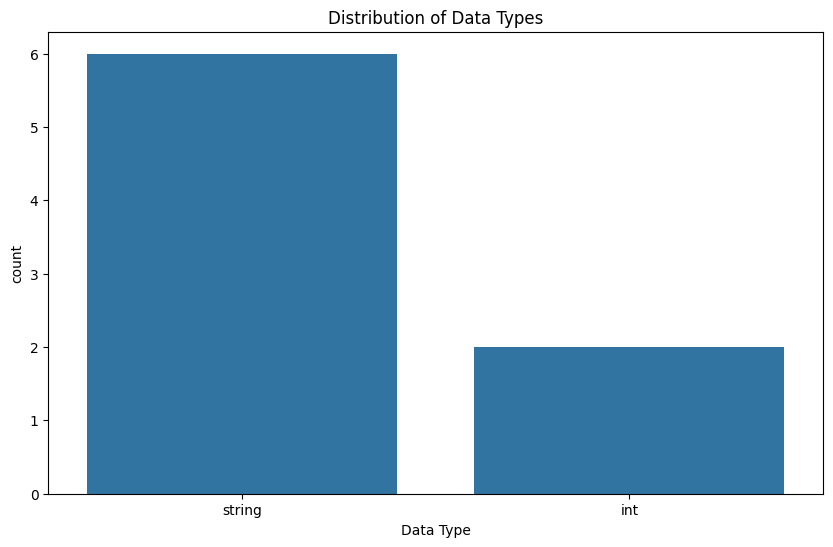

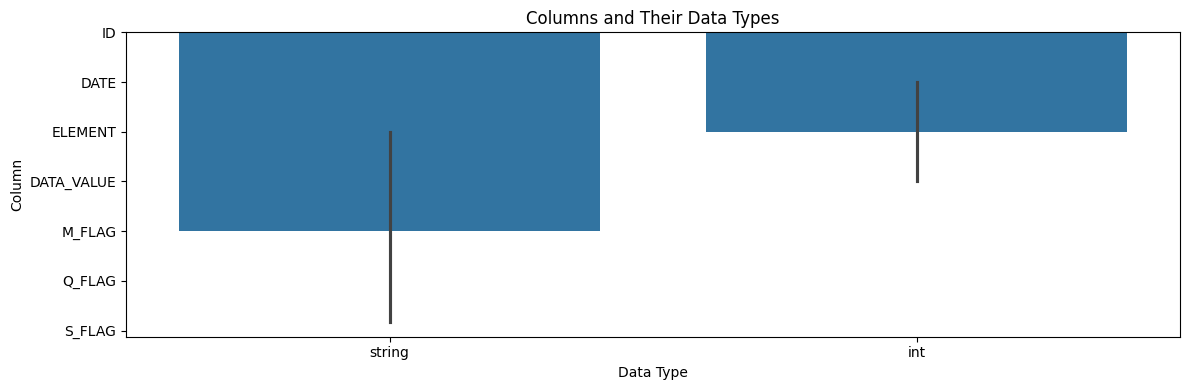


Sample Data Preview:


,ID,DATE,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
0,AGM00060430,20230101,TMIN,101,,,S,
1,AGM00060430,20230101,PRCP,0,,,S,
2,AGM00060430,20230101,TAVG,148,H,,S,
3,AGM00060437,20230101,TMIN,87,,,S,
4,AGM00060437,20230101,PRCP,0,,,S,


In [16]:
#@title ## **CSV Schema Inspector for S3-hosted Files**

import requests
import csv
import io
from typing import Dict, Any
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def inspect_csv_schema(file_path: str, num_rows: int = 1000) -> Dict[str, Any]:
    """
    Inspect the schema of a CSV file hosted on S3.

    Args:
    file_path (str): The URL of the CSV file.
    num_rows (int): Number of rows to inspect for determining data types.

    Returns:
    Dict[str, Any]: A dictionary containing schema information.
    """
    try:
        with requests.get(file_path, stream=True) as response:
            response.raise_for_status()
            lines = (line.decode('utf-8') for line in response.iter_lines())
            csv_reader = csv.reader(lines)

            # Read the header
            header = next(csv_reader)
            print(f"CSV Headers: {header}")

            # Initialize schema dictionary
            schema = {column: set() for column in header}

            # Inspect rows to determine data types
            for i, row in enumerate(csv_reader):
                if i >= num_rows:
                    break
                for column, value in zip(header, row):
                    try:
                        int(value)
                        schema[column].add('int')
                    except ValueError:
                        try:
                            float(value)
                            schema[column].add('float')
                        except ValueError:
                            schema[column].add('string')

            # Determine final data type for each column
            final_schema = {}
            for column, types in schema.items():
                if 'string' in types:
                    final_schema[column] = 'string'
                elif 'float' in types:
                    final_schema[column] = 'float'
                elif 'int' in types:
                    final_schema[column] = 'int'
                else:
                    final_schema[column] = 'unknown'

            print(f"Detected Schema: {final_schema}")

            # Additional schema statistics
            num_columns = len(header)
            data_types = list(final_schema.values())
            type_counts = {dtype: data_types.count(dtype) for dtype in set(data_types)}

            print(f"Number of columns: {num_columns}")
            print(f"Data type distribution: {type_counts}")

            return final_schema

    except requests.RequestException as e:
        print(f"Error fetching the CSV file: {str(e)}")
        return None
    except csv.Error as e:
        print(f"Error parsing the CSV file: {str(e)}")
        return None
    except Exception as e:
        print(f"Unexpected error during schema inspection: {str(e)}")
        return None

# Run the schema inspection
s3_path = 'https://noaa-ghcn-pds.s3.amazonaws.com/csv/by_year/2023.csv'
schema = inspect_csv_schema(s3_path)

if schema:
    print("Schema inspection completed successfully.")

    # Convert schema to DataFrame for easier visualization
    df_schema = pd.DataFrame(list(schema.items()), columns=['Column', 'Data Type'])

    # Display schema as a table
    display(df_schema)

    # Visualize data type distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Data Type', data=df_schema)
    plt.title('Distribution of Data Types')
    plt.show()

    # Visualize column names and their data types
    plt.figure(figsize=(12, len(schema) * 0.5))
    sns.barplot(x='Data Type', y='Column', data=df_schema)
    plt.title('Columns and Their Data Types')
    plt.tight_layout()
    plt.show()
else:
    print("Schema inspection failed.")

# Sample data preview
print("\nSample Data Preview:")
sample_size = 5
with requests.get(s3_path, stream=True) as response:
    response.raise_for_status()
    lines = (line.decode('utf-8') for line in response.iter_lines())
    csv_reader = csv.reader(lines)
    headers = next(csv_reader)
    sample_data = [headers] + [next(csv_reader) for _ in range(sample_size)]

df_sample = pd.DataFrame(sample_data[1:], columns=sample_data[0])
display(df_sample)

In [17]:
#@title ## **Create Destination Table**
from google.cloud import bigquery

# Initialize BigQuery client
client = bigquery.Client()

# Set the project and dataset information
project_id = "still-crow-437120-m9"
dataset_id = "BTU_Test" # your_dataset_id
table_id = "processed_weather_data"

# Define the schema for the new table
schema = [
    bigquery.SchemaField("station_id", "STRING"),
    bigquery.SchemaField("timestamp", "TIMESTAMP"),
    bigquery.SchemaField("temperature", "FLOAT64"),
    bigquery.SchemaField("humidity", "FLOAT64"),
    bigquery.SchemaField("wind_speed", "FLOAT64"),
    bigquery.SchemaField("precipitation", "FLOAT64"),
    bigquery.SchemaField("pressure", "FLOAT64"),
    bigquery.SchemaField("latitude", "FLOAT64"),
    bigquery.SchemaField("longitude", "FLOAT64")
]

# Set the full table reference
table_ref = f"{project_id}.{dataset_id}.{table_id}"

# Define table object
table = bigquery.Table(table_ref, schema=schema)

# Create the table
try:
    table = client.create_table(table)
    print(f"Created table {table.project}.{table.dataset_id}.{table.table_id}")
except Exception as e:
    print(f"An error occurred: {e}")

# Optionally, you can set a description for the table
table.description = "Processed weather data from NOAA Global Historical Climatology Network Daily"
table = client.update_table(table, ["description"])
print(f"Table description updated.")

# Optionally, you can set the table's expiration time (e.g., 90 days from now)
# import datetime
# expiration = datetime.datetime.now(datetime.timezone.utc) + datetime.timedelta(days=90)
# table.expires = expiration
# table = client.update_table(table, ["expires"])
# print(f"Table expiration set to {expiration}")

An error occurred: 403 POST https://bigquery.googleapis.com/bigquery/v2/projects/still-crow-437120-m9/datasets/BTU_Test/tables?prettyPrint=false: Access Denied: Dataset still-crow-437120-m9:BTU_Test: Permission bigquery.tables.create denied on dataset still-crow-437120-m9:BTU_Test (or it may not exist).


Forbidden: 403 PATCH https://bigquery.googleapis.com/bigquery/v2/projects/still-crow-437120-m9/datasets/BTU_Test/tables/processed_weather_data?prettyPrint=false: Access Denied: Table still-crow-437120-m9:BTU_Test.processed_weather_data: Permission bigquery.tables.get denied on table still-crow-437120-m9:BTU_Test.processed_weather_data (or it may not exist).

In [ ]:
#@title ## **Ingestion from AWS S3**

import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.io.gcp.bigquery import WriteToBigQuery
import requests
import csv
import io
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Function to read CSV data from public S3 bucket
def read_csv_from_public_s3(s3_path):
    http_path = s3_path.replace('s3://', 'https://')
    response = requests.get(http_path)
    response.raise_for_status()  # Raise an exception for bad status codes
    csv_data = response.text
    csv_reader = csv.DictReader(io.StringIO(csv_data))
    return list(csv_reader)

# Transformation function to process each weather data record
def process_weather_data(record):
    return {
        'station_id': record['ID'],
        'timestamp': f"{record['DATE']}T00:00:00",  # Assuming midnight for the timestamp
        'temperature': float(record['TMAX']) / 10 if 'TMAX' in record else None,  # Convert to Celsius
        'humidity': None,  # GHCN-D doesn't provide humidity
        'wind_speed': None,  # GHCN-D doesn't provide wind speed
        'precipitation': float(record['PRCP']) if 'PRCP' in record else None,
        'pressure': None,  # GHCN-D doesn't provide pressure
        'latitude': None,  # GHCN-D doesn't provide latitude in this file
        'longitude': None  # GHCN-D doesn't provide longitude in this file
    }

# Set up the pipeline options
options = PipelineOptions(
    streaming=False,
    project='still-crow-437120-m9',
    region='us-central1',
    temp_location='gs://btu_bda_bucket/temp'
)

# Define the schema for BigQuery
table_schema = {
    'fields': [
        {'name': 'station_id', 'type': 'STRING'},
        {'name': 'timestamp', 'type': 'TIMESTAMP'},
        {'name': 'temperature', 'type': 'FLOAT'},
        {'name': 'humidity', 'type': 'FLOAT'},
        {'name': 'wind_speed', 'type': 'FLOAT'},
        {'name': 'precipitation', 'type': 'FLOAT'},
        {'name': 'pressure', 'type': 'FLOAT'},
        {'name': 'latitude', 'type': 'FLOAT'},
        {'name': 'longitude', 'type': 'FLOAT'}
    ]
}

# S3 path to the public dataset
s3_path = 'https://noaa-ghcn-pds.s3.amazonaws.com/csv/by_year/2023.csv'

# Set up the Beam pipeline
with beam.Pipeline(options=options) as p:
    (p
     | 'Read S3 Data' >> beam.Create([s3_path])
     | 'Fetch Data from S3' >> beam.FlatMap(lambda path: read_csv_from_public_s3(path))
     | 'Process Weather Data' >> beam.Map(process_weather_data)
     | 'Write to BigQuery' >> WriteToBigQuery(
         'still-crow-437120-m9.BTU_Test.processed_weather_data',
         schema=table_schema,
         write_disposition=beam.io.BigQueryDisposition.WRITE_APPEND,
         create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED
     )
    )

## **Batch Series**

This approach provides more control over how data is batched and written to BigQuery. The exact values for batch sizes and file sizes should be tuned based on your specific data and performance requirements.

**Benefits of this approach:**

1. Better memory management, especially for large datasets.
2. More consistent performance and potentially faster overall processing.
3. Easier to monitor and debug, as you can see progress in smaller increments.

Remember, the optimal batch size depends on various factors including your data size, available resources, and BigQuery's current load. You may need to experiment with different batch sizes to find the best performance for your specific use case.

In [ ]:
#@title ## **Ingestion in Series of Batches**

import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.io.gcp.bigquery import WriteToBigQuery
import requests
import csv
import io
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Function to read CSV data from public S3 bucket
def read_csv_from_public_s3(s3_path):
    http_path = s3_path.replace('s3://', 'https://')
    response = requests.get(http_path)
    response.raise_for_status()  # Raise an exception for bad status codes
    csv_data = response.text
    csv_reader = csv.DictReader(io.StringIO(csv_data))
    return list(csv_reader)

# Transformation function to process each weather data record
def process_weather_data(record):
    return {
        'station_id': record['ID'],
        'timestamp': f"{record['DATE']}T00:00:00",  # Assuming midnight for the timestamp
        'temperature': float(record['TMAX']) / 10 if 'TMAX' in record else None,  # Convert to Celsius
        'humidity': None,  # GHCN-D doesn't provide humidity
        'wind_speed': None,  # GHCN-D doesn't provide wind speed
        'precipitation': float(record['PRCP']) if 'PRCP' in record else None,
        'pressure': None,  # GHCN-D doesn't provide pressure
        'latitude': None,  # GHCN-D doesn't provide latitude in this file
        'longitude': None  # GHCN-D doesn't provide longitude in this file
    }

# Set up the pipeline options
options = PipelineOptions(
    streaming=False,
    project='still-crow-437120-m9',
    region='us-central1',
    temp_location='gs://btu_bda_bucket/temp'
)

# Define the schema for BigQuery
table_schema = {
    'fields': [
        {'name': 'station_id', 'type': 'STRING'},
        {'name': 'timestamp', 'type': 'TIMESTAMP'},
        {'name': 'temperature', 'type': 'FLOAT'},
        {'name': 'humidity', 'type': 'FLOAT'},
        {'name': 'wind_speed', 'type': 'FLOAT'},
        {'name': 'precipitation', 'type': 'FLOAT'},
        {'name': 'pressure', 'type': 'FLOAT'},
        {'name': 'latitude', 'type': 'FLOAT'},
        {'name': 'longitude', 'type': 'FLOAT'}
    ]
}

# S3 path to the public dataset
s3_path = 'https://noaa-ghcn-pds.s3.amazonaws.com/csv/by_year/2023.csv'

# Set up the Beam pipeline
with beam.Pipeline(options=options) as p:
    (p
     | 'Read S3 Data' >> beam.Create([s3_path])
     | 'Fetch Data from S3' >> beam.FlatMap(lambda path: read_csv_from_public_s3(path))
     | 'Process Weather Data' >> beam.Map(process_weather_data)
     | 'Batch Data' >> beam.BatchElements(min_batch_size=1000, max_batch_size=2000)
     | 'Write to BigQuery' >> WriteToBigQuery(
         'still-crow-437120-m9.BTU_Test.processed_weather_data',
         schema=table_schema,
         write_disposition=beam.io.BigQueryDisposition.WRITE_APPEND,
         create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED,
         batch_size=500,  # Number of rows to be written per request
         max_file_size=1024 * 1024 * 15  # 15 MB max file size
     )
    )

In [ ]:
#@title ## **Optimized Batched Pipeline**

import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.io.gcp.bigquery import WriteToBigQuery
import requests
import csv
import io
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Function to stream CSV data from public S3 bucket
def stream_csv_from_public_s3(s3_path):
    with requests.get(s3_path, stream=True) as response:
        response.raise_for_status()
        lines = (line.decode('utf-8') for line in response.iter_lines())
        csv_reader = csv.DictReader(lines)
        for row in csv_reader:
            yield row

# Transformation function to process each weather data record
def process_weather_data(record):
    return {
        'station_id': record['ID'],
        'timestamp': f"{record['DATE']}T00:00:00",
        'temperature': float(record['TMAX']) / 10 if 'TMAX' in record and record['TMAX'] else None,
        'humidity': None,
        'wind_speed': None,
        'precipitation': float(record['PRCP']) if 'PRCP' in record and record['PRCP'] else None,
        'pressure': None,
        'latitude': None,
        'longitude': None
    }

# Set up the pipeline options
options = PipelineOptions(
    streaming=False,
    project='still-crow-437120-m9',
    region='us-central1',
    temp_location='gs://btu_bda_bucket/temp',
    max_num_workers=4,  # Adjust based on your needs and quotas
    disk_size_gb=50  # Increase disk size for workers
)

# Define the schema for BigQuery
table_schema = {
    'fields': [
        {'name': 'station_id', 'type': 'STRING'},
        {'name': 'timestamp', 'type': 'TIMESTAMP'},
        {'name': 'temperature', 'type': 'FLOAT'},
        {'name': 'humidity', 'type': 'FLOAT'},
        {'name': 'wind_speed', 'type': 'FLOAT'},
        {'name': 'precipitation', 'type': 'FLOAT'},
        {'name': 'pressure', 'type': 'FLOAT'},
        {'name': 'latitude', 'type': 'FLOAT'},
        {'name': 'longitude', 'type': 'FLOAT'}
    ]
}

# S3 path to the public dataset
s3_path = 'https://noaa-ghcn-pds.s3.amazonaws.com/csv/by_year/2023.csv'

# Set up the Beam pipeline
with beam.Pipeline(options=options) as p:
    (p
     | 'Create S3 Path' >> beam.Create([s3_path])
     | 'Stream Data from S3' >> beam.FlatMap(stream_csv_from_public_s3)
     | 'Process Weather Data' >> beam.Map(process_weather_data)
     | 'Remove None Values' >> beam.Map(lambda x: {k: v for k, v in x.items() if v is not None})
     | 'Batch Data' >> beam.BatchElements(min_batch_size=1000, max_batch_size=2000)
     | 'Write to BigQuery' >> WriteToBigQuery(
         'still-crow-437120-m9.BTU_Test.processed_weather_data',
         schema=table_schema,
         write_disposition=beam.io.BigQueryDisposition.WRITE_APPEND,
         create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED,
         batch_size=500,
         max_file_size=1024 * 1024 * 15  # 15 MB max file size
     )
    )

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.io.gcp.bigquery import WriteToBigQuery
import requests
import csv
import io
import json
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


def read_csv_from_public_s3(s3_path):
    http_path = s3_path.replace('s3://', 'https://')
    response = requests.get(http_path)
    response.raise_for_status()
    csv_data = response.text
    csv_reader = csv.reader(io.StringIO(csv_data))
    headers = next(csv_reader)  # Read the header row
    return [dict(zip(headers, row)) for row in csv_reader]

def process_weather_data(record):
    try:
        return {
            'station_id': record.get('ID', ''),
            'date': record.get('DATE', ''),
            'element': record.get('ELEMENT', ''),
            'value': float(record.get('VALUE', 0)) if record.get('VALUE') else None,
            'quality_flag': record.get('QFLAG', '')
        }
    except ValueError:
        # Handle cases where float conversion fails
        return None

# Set up the pipeline options
options = PipelineOptions(
    streaming=False,
    project='still-crow-437120-m9',
    region='us-central1',
    temp_location='gs://btu_bda_bucket/temp'
)

# Define the schema for BigQuery
table_schema = {
    'fields': [
        {'name': 'station_id', 'type': 'STRING'},
        {'name': 'date', 'type': 'STRING'},
        {'name': 'element', 'type': 'STRING'},
        {'name': 'value', 'type': 'FLOAT'},
        {'name': 'quality_flag', 'type': 'STRING'}
    ]
}

# S3 path to the public dataset
s3_path = 'https://noaa-ghcn-pds.s3.amazonaws.com/csv/by_year/2023.csv'

# Set up the Beam pipeline
with beam.Pipeline(options=options) as p:
    (p
     | 'Read S3 Data' >> beam.Create([s3_path])
     | 'Fetch Data from S3' >> beam.FlatMap(read_csv_from_public_s3)
     | 'Process Weather Data' >> beam.Map(process_weather_data)
     | 'Remove None Values' >> beam.Filter(lambda x: x is not None)
     | 'Write to BigQuery' >> WriteToBigQuery(
         'still-crow-437120-m9.BTU_Test.processed_weather_data',
         schema=table_schema,
         write_disposition=beam.io.BigQueryDisposition.WRITE_APPEND,
         create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED,
         method='STREAMING_INSERTS'
     )
    )

print("Pipeline execution completed.")